In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from random import gauss
import math
from scipy.stats import pearsonr

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Question 2.3

In [2]:
avg_smse = pd.read_csv("../MAST30034-Assignment1/data/smse.csv")
Arr = pd.read_csv("../MAST30034-Assignment1/data/Arr.csv")
Drr = pd.read_csv("../MAST30034-Assignment1/data/Drr.csv")
Alr = pd.read_csv("../MAST30034-Assignment1/data/alr.csv")
Dlr = pd.read_csv("../MAST30034-Assignment1/data/dlr.csv")
TC = pd.read_csv("../MAST30034-Assignment1/data/TC.csv")
SM = pd.read_csv("../MAST30034-Assignment1/data/SM.csv")
X = pd.read_csv("../MAST30034-Assignment1/data/X.csv")

NUM_SOURCE = 6
X1 = 21
X2 = 21
V = 441
N = 240
LABEL = ['First', 'Second', 'Third', 'Fourth', 'Fifth', 'Sixth']

rho = []
r = 0.0
for i in range(X1):
    rho.append(round(r,2))
    r += 0.05
    
avg_smse['rho'] = rho
avg_smse = avg_smse.set_index('rho')

### MSE started to increase when rho = 0.7

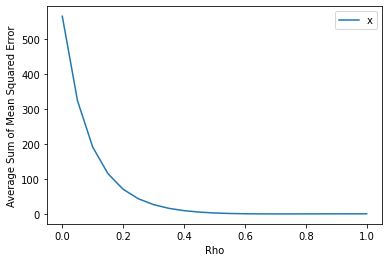

In [76]:
ax = sns.lineplot(data = avg_smse)
ax.set(xlabel='Rho', ylabel='Average Sum of Mean Squared Error')
plt.savefig('../MAST30034-Assignment1/plots/Q2_3-1.png')

# Question 2.4

In [4]:
min_smse = avg_smse.index[avg_smse['x'] == avg_smse['x'].min()]
min_rho = min_smse[0]

In [5]:
Arr = Arr.drop(columns='Unnamed: 0')
Drr = Drr.drop(columns='Unnamed: 0')
TC = TC.drop(columns='Unnamed: 0')
SM = SM.drop(columns='Unnamed: 0')
X = X.drop(columns='Unnamed: 0')
Alr = Alr.T
Dlr = Dlr.rename(columns = {'V1':'0', 'V2':'1', 'V3':'2', 'V4':'3', 'V5':'4', 'V6':'5'})

In [6]:
ctrr = []
csrr = []
ctlr = []
cslr = []
for i in range(NUM_SOURCE):
    corr, _ = pearsonr(TC[str(i)], Drr[str(i)])
    ctrr.append(corr)

    corr2, _ = pearsonr(SM[str(i)], Arr[str(i)])
    csrr.append(corr2)

    corr3, _ = pearsonr(TC[str(i)], Dlr[str(i)])
    ctlr.append(corr3)

    corr4, _ = pearsonr(SM[str(i)], Alr[i])
    cslr.append(corr4)

print("Sum of CtLR greater than Sum of CtRR: ", sum(ctrr) < sum(ctlr))
print("Sum of CsLR greater than Sum of CsRR: ", sum(csrr) < sum(cslr))

Sum of CtLR greater than Sum of CtRR:  False
Sum of CsLR greater than Sum of CsRR:  True


In [7]:
A_rr = []
A_lr = []
arr = np.array(Arr.T)
alr = np.array(Alr.T)

for row in range(NUM_SOURCE):
    A_rr.append(arr[row].reshape((X1, X2)))
    A_lr.append(alr[row].reshape((X1, X2)))

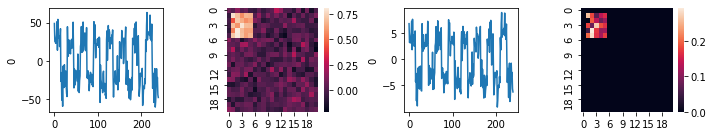

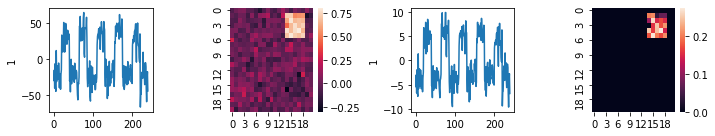

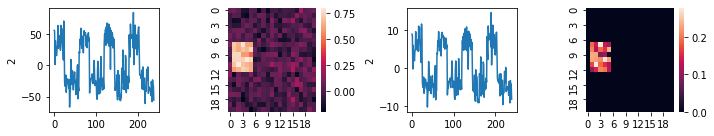

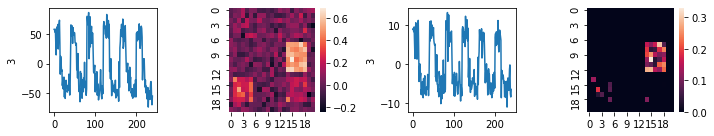

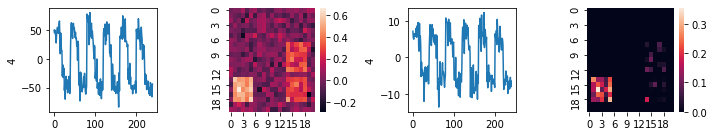

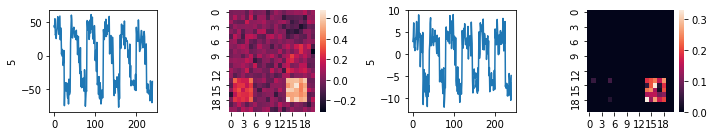

In [81]:
for i in range(NUM_SOURCE):
    fig, axes = plt.subplots(1, 4, figsize=(10,2))
    sns.lineplot(data= Drr[str(i)], ax = axes[0])
    sns.heatmap(data = A_rr[i], ax = axes[1])
    sns.lineplot(data= Dlr[str(i)], ax = axes[2])
    sns.heatmap(data = A_lr[i], ax = axes[3])
    plt.savefig('../MAST30034-Assignment1/plots/Q2_4-' + str(i+1) + '.png')
    plt.tight_layout()
    plt.show()

# Question 2.5

In [9]:
#https://numpy.org/doc/stable/reference/generated/numpy.linalg.svd.html

In [74]:
u, v, w = np.linalg.svd(X, 5)
u_df = pd.DataFrame(u)
v_df = pd.DataFrame(v)
w_df = pd.DataFrame(w)

In [66]:
u_df.shape

(240, 240)

<AxesSubplot:>

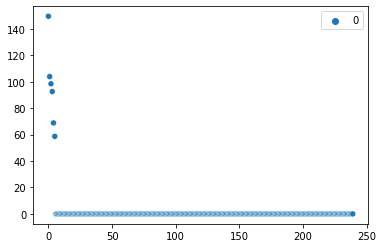

In [75]:
sns.scatterplot(data=v_df)

In [71]:
from sklearn.decomposition import PCA
pca = PCA(n_components=5)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents)


In [73]:
X.shape

(240, 441)

In [72]:
principalDf

,0,1,2,3,4
0,13.191053,9.848832,5.551277,-3.548919,-5.444317
1,12.391456,8.490482,2.107023,-0.214230,-4.817077
2,12.285334,-0.214048,9.011093,-1.654798,-3.189081
3,11.339292,5.608028,0.441232,-1.130480,-6.357131
4,8.981835,3.190771,7.551097,-1.594102,-3.510108
5,5.950588,3.872949,9.069133,-2.366013,-0.722303
6,11.401609,2.707900,-0.219172,-8.630267,-2.356178
7,12.530821,3.605084,5.012402,1.429881,-7.246912
8,13.822817,5.975271,5.713165,-6.033416,-2.431971
9,14.983214,9.770816,1.606267,-0.717635,-2.627218
